In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

In [19]:
plt.style.use("seaborn-v0_8-darkgrid")

In [20]:
path = "./data"   
files = glob.glob(os.path.join(path, "*.csv"))

In [21]:
data_dict = {}
for file in files:
    name = os.path.basename(file).replace(".csv", "")
    df = pd.read_csv(file)
    df["Company"] = name
    data_dict[name] = df

data_dict.keys()

dict_keys(['Amazon', 'Apple', 'Facebook', 'Google', 'Netflix'])

In [22]:
faang = pd.concat(data_dict.values(), ignore_index=True)

print(f"Combined shape: {faang.shape}")
faang.head()

Combined shape: (26566, 8)


,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000.0,Amazon
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000.0,Amazon
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800.0,Amazon
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200.0,Amazon
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200.0,Amazon


In [23]:
faang.info()
faang.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26566 entries, 0 to 26565
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       26566 non-null  object 
 1   Open       26565 non-null  float64
 2   High       26565 non-null  float64
 3   Low        26565 non-null  float64
 4   Close      26565 non-null  float64
 5   Adj Close  26565 non-null  float64
 6   Volume     26565 non-null  float64
 7   Company    26566 non-null  object 
dtypes: float64(6), object(2)
memory usage: 1.6+ MB


,Open,High,Low,Close,Adj Close,Volume
count,26565.000000,26565.000000,26565.000000,26565.000000,26565.000000,2.656500e+04
mean,190.406730,192.465780,188.206288,190.428805,190.224947,1.369710e+08
std,379.619521,383.523704,375.382955,379.673774,379.764606,2.640676e+08
min,0.049665,0.049665,0.049107,0.049107,0.038743,2.856000e+05
25%,1.658571,1.700000,1.628571,1.657143,1.628571,6.040800e+06
50%,33.615002,34.279999,33.080002,33.754284,33.490002,1.856200e+07
75%,193.059998,195.300003,190.545547,193.149994,193.149994,1.615040e+08
max,3251.060059,3344.290039,3165.429932,3225.000000,3225.000000,7.421641e+09


In [24]:
faang[
    faang[["Open", "High", "Low", "Close", "Adj Close", "Volume"]].isna().any(axis=1)
]

,Date,Open,High,Low,Close,Adj Close,Volume,Company
6017,1981-08-10,NaN,NaN,NaN,NaN,NaN,NaN,Apple


In [25]:
faang["Company"].value_counts()

# Missing values
faang.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
Company      0
dtype: int64

In [26]:
#convert date to datetime
faang["Date"] = pd.to_datetime(faang["Date"])
faang = faang.sort_values(["Company", "Date"])

In [27]:
faang.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000.0,Amazon
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000.0,Amazon
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800.0,Amazon
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200.0,Amazon
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200.0,Amazon


In [28]:
# remove duplicate
before = faang.shape[0]
faang = faang.drop_duplicates()
after = faang.shape[0]

print(f"Duplicates removed: {before - after}")

Duplicates removed: 0


In [29]:
#replace missing value

faang[( faang['Date'] == '1981-08-10')]
faang = faang.dropna()
faang.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Company      0
dtype: int64

In [30]:
#adjust data type
faang['Company'] = faang['Company'].astype('category')
faang.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
Company            category
dtype: object

In [31]:
#check outliers
numeric_cols = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
faang[( faang[numeric_cols] <0).any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume,Company


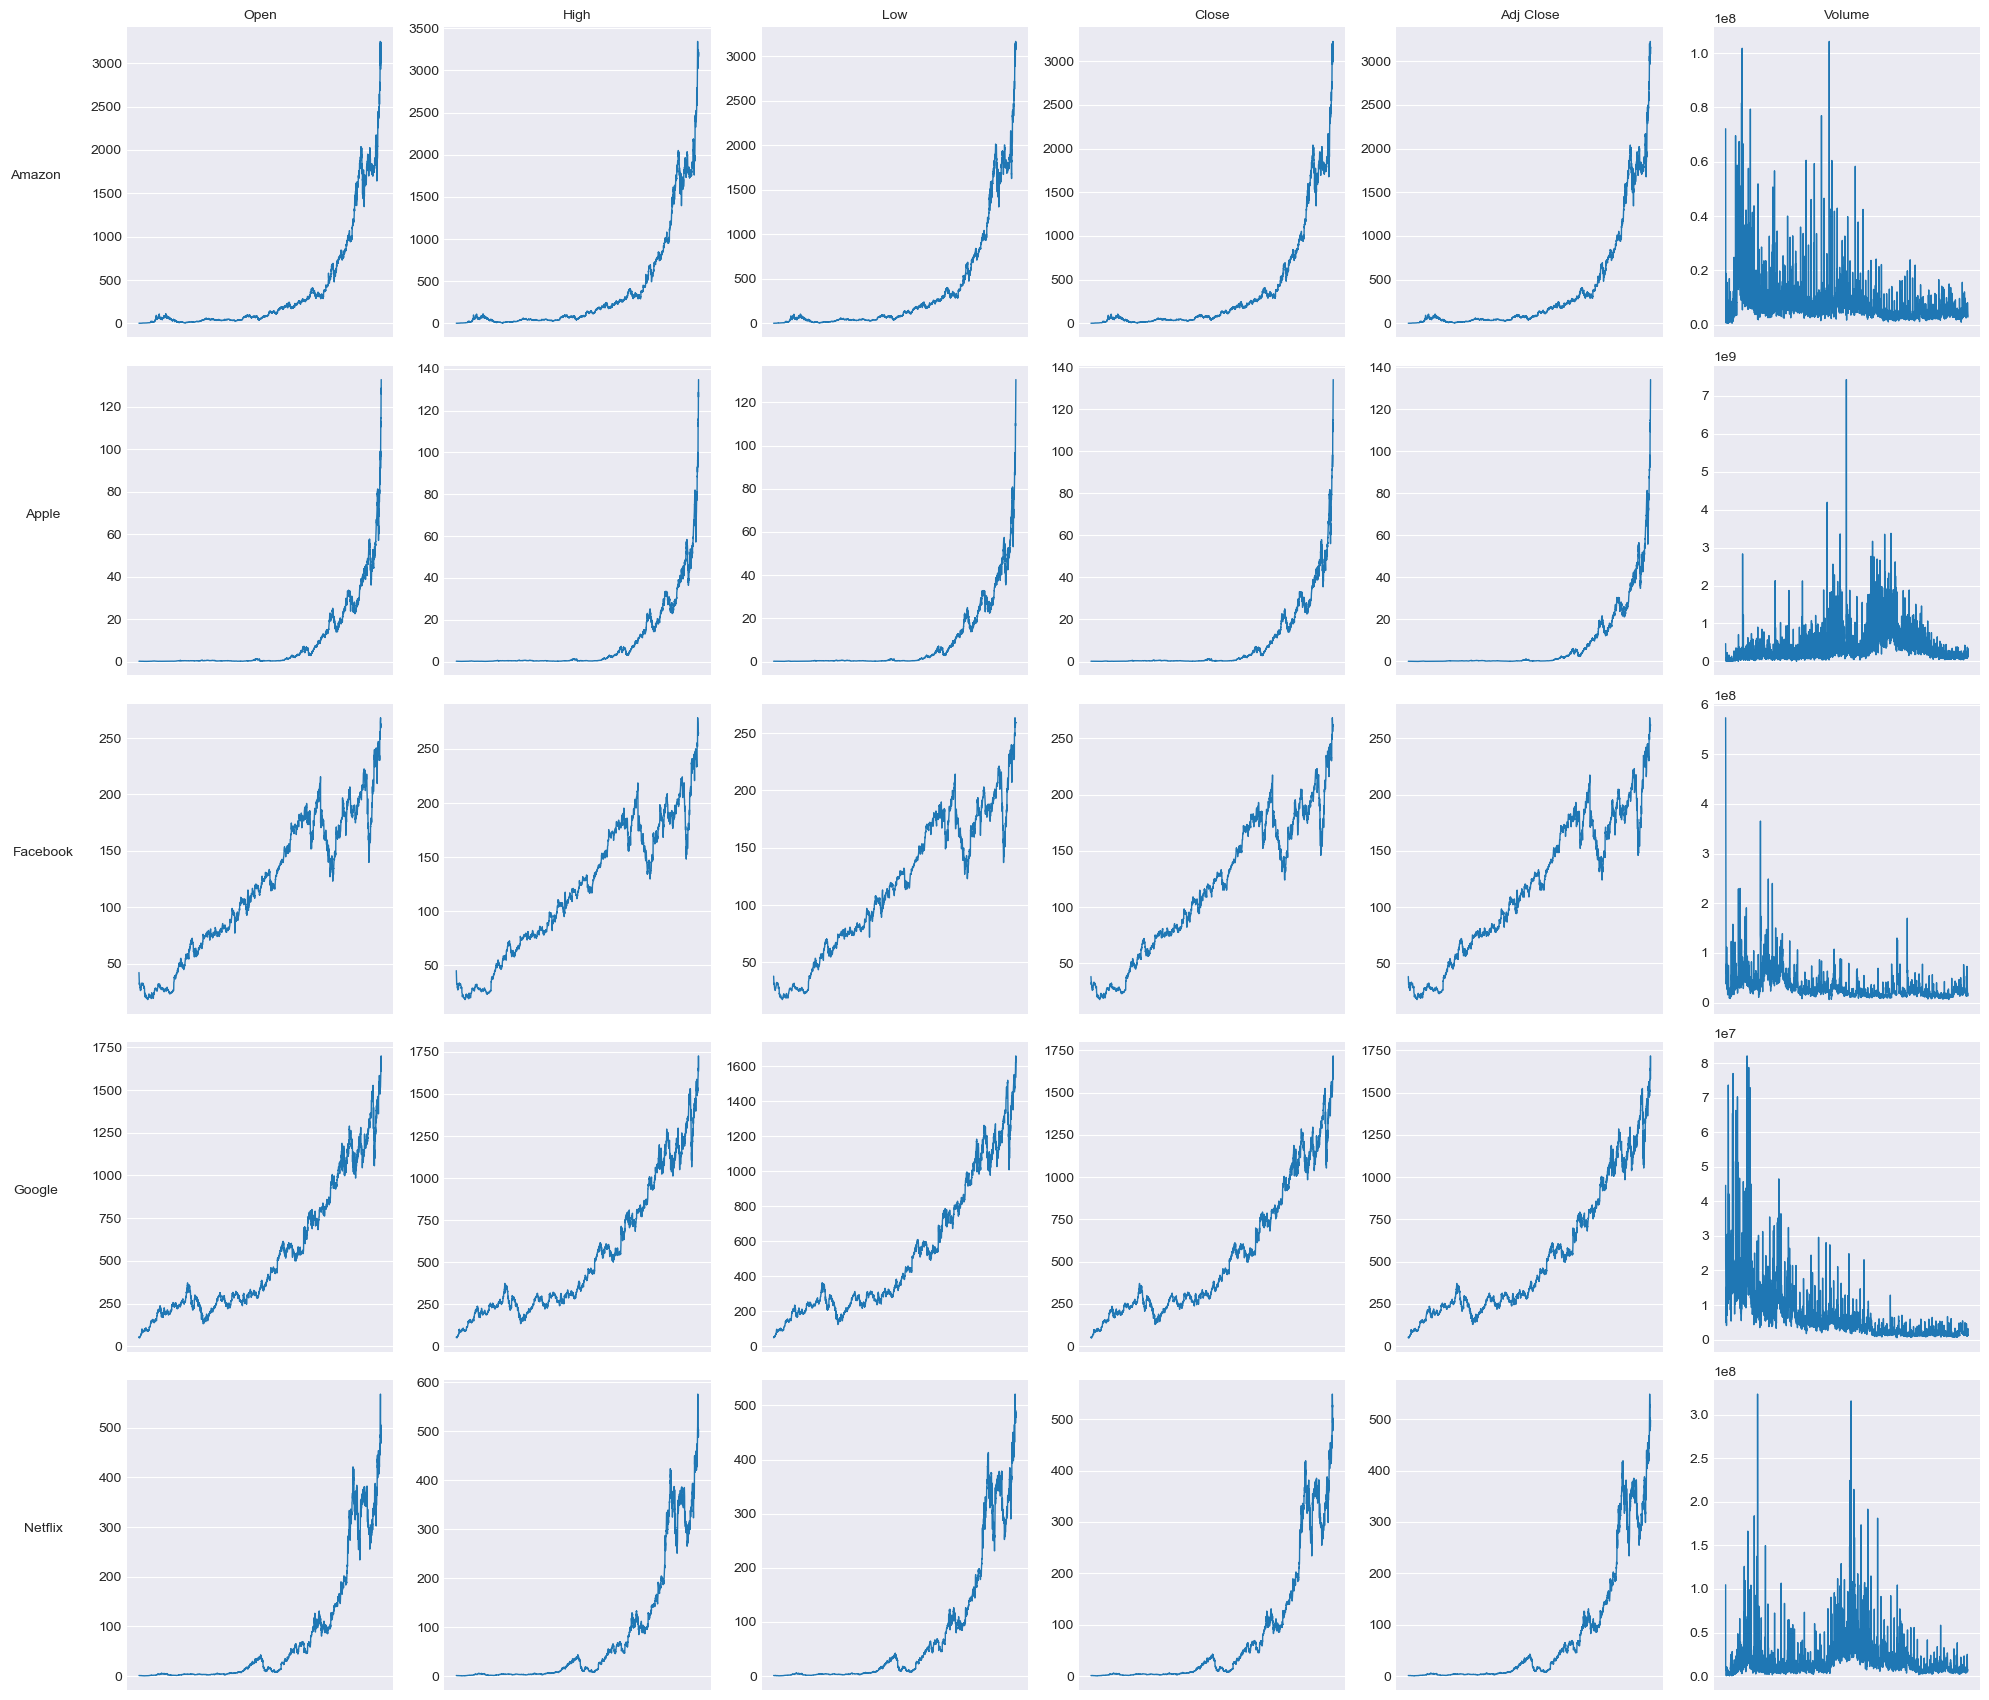

In [32]:
numeric_cols = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
companies = faang["Company"].unique()

rows = len(companies)
cols = len(numeric_cols)

plt.figure(figsize=(20, 18))

for i, company in enumerate(companies):
    subset = faang[faang["Company"] == company]

    for j, col in enumerate(numeric_cols):
        plt.subplot(rows, cols, i * cols + j + 1)
        plt.plot(subset["Date"], subset[col], linewidth=1)

        # Title only on top row
        if i == 0:
            plt.title(col, fontsize=10)

        # Company label only on left
        if j == 0:
            plt.ylabel(company, rotation=0, labelpad=40, fontsize=10)

        plt.xticks([], [])  # hide individual x-axis labels

# Make space for bottom label
plt.tight_layout(rect=[0, 0.05, 1, 1])

# Add global x-label


plt.show()

In [33]:
faang["Target"] = (
    faang.groupby("Company", observed=False)["Adj Close"]
    .shift(-1) > faang["Adj Close"]
).astype(int)

faang["Year"] = faang["Date"].dt.year
faang["Month"] = faang["Date"].dt.month
faang["Day"] = faang["Date"].dt.day
faang["DayOfWeek"] = faang["Date"].dt.dayofweek

faang["MA7"] = (
    faang.groupby("Company", observed=False)["Adj Close"]
    .rolling(7)
    .mean()
    .reset_index(level=0, drop=True)
)

faang["MA14"] = (
    faang.groupby("Company", observed=False)["Adj Close"]
    .rolling(14)
    .mean()
    .reset_index(level=0, drop=True)
)

faang["VOL7"] = (
    faang.groupby("Company", observed=False)["Volume"]
    .rolling(7)
    .mean()
    .reset_index(level=0, drop=True)
)

faang["Return1"] = (
    faang.groupby("Company", observed=False)["Adj Close"]
    .pct_change()
)

faang["Return7"] = (
    faang.groupby("Company", observed=False)["Adj Close"]
    .pct_change(7)
)

faang = faang.dropna()

In [35]:
faang.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Target,Year,Month,Day,DayOfWeek,MA7,MA14,VOL7,Return1,Return7
13,1997-06-04,1.479167,1.489583,1.395833,1.416667,1.416667,3080400.0,Amazon,1,1997,6,4,2,1.503720,1.562872,3.456343e+06,-0.042254,-0.055555
14,1997-06-05,1.416667,1.541667,1.375000,1.541667,1.541667,5672400.0,Amazon,1,1997,6,5,3,1.497768,1.533110,3.024171e+06,0.088235,-0.026315
15,1997-06-06,1.515625,1.708333,1.510417,1.656250,1.656250,7807200.0,Amazon,1,1997,6,6,4,1.515625,1.527902,3.486000e+06,0.074324,0.081633
16,1997-06-09,1.656250,1.708333,1.656250,1.687500,1.687500,2352000.0,Amazon,0,1997,6,9,0,1.541667,1.526414,3.325886e+06,0.018868,0.121108
17,1997-06-10,1.708333,1.708333,1.531250,1.583333,1.583333,5458800.0,Amazon,0,1997,6,10,1,1.553572,1.522693,3.735086e+06,-0.061729,0.055555
18,1997-06-11,1.593750,1.604167,1.531250,1.541667,1.541667,1188000.0,Amazon,1,1997,6,11,2,1.558036,1.530878,3.820286e+06,-0.026315,0.020690
19,1997-06-12,1.583333,1.645833,1.552083,1.604167,1.604167,1632000.0,Amazon,0,1997,6,12,3,1.575893,1.545759,3.884400e+06,0.040541,0.084507
20,1997-06-13,1.625000,1.625000,1.583333,1.583333,1.583333,693600.0,Amazon,0,1997,6,13,4,1.599702,1.551711,3.543429e+06,-0.012987,0.117647
21,1997-06-16,1.604167,1.604167,1.562500,1.572917,1.572917,913200.0,Amazon,0,1997,6,16,0,1.604167,1.550967,2.863543e+06,-0.006579,0.020270
22,1997-06-17,1.598958,1.598958,1.494792,1.505208,1.505208,4706400.0,Amazon,1,1997,6,17,1,1.582589,1.549107,2.420571e+06,-0.043047,-0.091195


In [36]:
#get dummies
faang = pd.get_dummies(faang, columns=["Company"], drop_first=True)

In [37]:
faang.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Target,Year,Month,...,DayOfWeek,MA7,MA14,VOL7,Return1,Return7,Company_Apple,Company_Facebook,Company_Google,Company_Netflix
13,1997-06-04,1.479167,1.489583,1.395833,1.416667,1.416667,3080400.0,1,1997,6,...,2,1.503720,1.562872,3.456343e+06,-0.042254,-0.055555,False,False,False,False
14,1997-06-05,1.416667,1.541667,1.375000,1.541667,1.541667,5672400.0,1,1997,6,...,3,1.497768,1.533110,3.024171e+06,0.088235,-0.026315,False,False,False,False
15,1997-06-06,1.515625,1.708333,1.510417,1.656250,1.656250,7807200.0,1,1997,6,...,4,1.515625,1.527902,3.486000e+06,0.074324,0.081633,False,False,False,False
16,1997-06-09,1.656250,1.708333,1.656250,1.687500,1.687500,2352000.0,0,1997,6,...,0,1.541667,1.526414,3.325886e+06,0.018868,0.121108,False,False,False,False
17,1997-06-10,1.708333,1.708333,1.531250,1.583333,1.583333,5458800.0,0,1997,6,...,1,1.553572,1.522693,3.735086e+06,-0.061729,0.055555,False,False,False,False
18,1997-06-11,1.593750,1.604167,1.531250,1.541667,1.541667,1188000.0,1,1997,6,...,2,1.558036,1.530878,3.820286e+06,-0.026315,0.020690,False,False,False,False
19,1997-06-12,1.583333,1.645833,1.552083,1.604167,1.604167,1632000.0,0,1997,6,...,3,1.575893,1.545759,3.884400e+06,0.040541,0.084507,False,False,False,False
20,1997-06-13,1.625000,1.625000,1.583333,1.583333,1.583333,693600.0,0,1997,6,...,4,1.599702,1.551711,3.543429e+06,-0.012987,0.117647,False,False,False,False
21,1997-06-16,1.604167,1.604167,1.562500,1.572917,1.572917,913200.0,0,1997,6,...,0,1.604167,1.550967,2.863543e+06,-0.006579,0.020270,False,False,False,False
22,1997-06-17,1.598958,1.598958,1.494792,1.505208,1.505208,4706400.0,1,1997,6,...,1,1.582589,1.549107,2.420571e+06,-0.043047,-0.091195,False,False,False,False


In [38]:
#SCALING NUMERIC FEATURES
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
num_cols = [
    "Open", "High", "Low", "Close", "Adj Close", "Volume",
    "Year", "Month", "Day", "DayOfWeek",
    "MA7", "MA14", "VOL7", "Return1", "Return7"
]
scaler = StandardScaler()
faang[num_cols] = scaler.fit_transform(faang[num_cols])


In [39]:
#TRAIN / TEST SPLIT
X = faang.drop(["Target", "Date"], axis=1)
y = faang["Target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=False
)

print(X_train.shape, X_test.shape)

(18550, 19) (7950, 19)
